# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Data Loading and Initial Analysis

Explanation: This code segment imports the necessary libraries, loads a dataset into a DataFrame, displays the first 10 rows, provides basic information about the DataFrame, checks for missing values, and prints the number of unique values in each column.

# I - Data Validation:

## 1- Initializing and Analyzing DataFrame
The code imports the pandas library, loads a dataset into a DataFrame, displays the first 10 rows, shows DataFrame information, checks for missing values, and prints the number of unique values in each column.

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset into a DataFrame
recipe_df = pd.read_csv('recipe_site_traffic_2212.csv')

# Display the first 10 rows of the DataFrame
print('First 10 rows of the DataFrame:')
print(recipe_df.head(10), '\n')

# Display basic informacdion about the DataFrame
print('DataFrame Information:')
print(recipe_df.info(), '\n')

# Check for missing values in each column
print('Number of missing values in each column:')
print(recipe_df.isna().sum(), '\n')

# Print the number of unique values in each column
print('Number of unique values in each column:')
print(recipe_df.nunique(), '\n')

#checking value count of categoory column
print('Number of value count of category column: ')
print(recipe_df['category'].value_counts())

First 10 rows of the DataFrame:
   recipe  calories  carbohydrate  sugar  protein        category servings  \
0       1       NaN           NaN    NaN      NaN            Pork        6   
1       2     35.48         38.56   0.66     0.92          Potato        4   
2       3    914.28         42.68   3.09     2.88       Breakfast        1   
3       4     97.03         30.56  38.63     0.02       Beverages        4   
4       5     27.05          1.85   0.80     0.53       Beverages        4   
5       6    691.15          3.46   1.65    53.93   One Dish Meal        2   
6       7    183.94         47.95   9.75    46.71  Chicken Breast        4   
7       8    299.14          3.17   0.40    32.40    Lunch/Snacks        4   
8       9    538.52          3.78   3.37     3.79            Pork        6   
9      10    248.28         48.54   3.99   113.85         Chicken        2   

  high_traffic  
0         High  
1         High  
2          NaN  
3         High  
4          NaN  
5      

* 5 out of 7 columns contained in the dataset have missing values
* Wrong datatype issue. The 'serving' column contains numerical values but have an object datatype
* 5 columns contain missing values and high_traffic column has the highest missing value
* There is Chicken variable and there is Chicken Breast variable but only Chicken was made mention of in the description table, 'Breast' will be dropped so that Chicken Breast and Chicken can become one variable stated in the description table

## 2- Cleaning and Resetting DataFrame

In [3]:
# Drop rows where there are fewer than 2 non-missing values
recipe_df.dropna(thresh=4, inplace=True)

# Reset the index
recipe_df.reset_index(drop=True, inplace=True)

# Check the result
print(recipe_df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        934 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      934 non-null    object 
 6   servings      934 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 58.5+ KB
None 



### 3 - Processing and Checking Categories

In [4]:
# Print the unique values in the 'category' column before change
print("Before change:", '\n', recipe_df['category'].unique(), '\n')

# Use the str.replace() method to replace 'Chicken Breast' with 'Chicken'
recipe_df['category'] = recipe_df['category'].str.replace('Chicken Breast', 'Chicken')

# Convert the 'category' column to categorical datatype
recipe_df['category'] = pd.Categorical(recipe_df['category'])

# Check the modifications
print("After change:", '\n', recipe_df['category'].unique(), '\n')

# Confirm the change
print("Data type of 'category' column:", recipe_df['category'].dtype)

Before change: 
 ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert'] 

After change: 
 ['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal', 'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert']
Categories (10, object): ['Beverages', 'Breakfast', 'Chicken', 'Dessert', ..., 'One Dish Meal', 'Pork', 'Potato', 'Vegetable'] 

Data type of 'category' column: category


### 4- Cleaning and Transforming the 'Servings' Column

In [5]:
# Print the unique values of the 'servings' column before modifications
print("Before change:", recipe_df['servings'].unique(), '\n')

# Use the str.replace() method to replace specific values in the 'servings' column
recipe_df['servings'] = recipe_df['servings'].str.replace('4 as a snack', '4').str.replace('6 as a snack', '6')

# Convert the 'servings' column to an integer data type
recipe_df['servings'] = pd.to_numeric(recipe_df['servings'], errors='coerce').astype('Int64')

# Check the modifications
print("After change:", recipe_df['servings'].unique(), '\n')

# Check the datatype of the 'servings' column
print("Data type of 'servings' column:", recipe_df['servings'].dtype)


Before change: ['6' '4' '1' '2' '4 as a snack' '6 as a snack'] 

After change: <IntegerArray>
[6, 4, 1, 2]
Length: 4, dtype: Int64 

Data type of 'servings' column: Int64


### 5- Handling Missing Values in Target Column
The 'high_traffic' column serves as the target variable and comprises only 'High' and 'NaN' values. Since we can't discard all the missing values, we'll make an assumption that the 'NaN' values indicate the absence of 'High' traffic. Therefore, we'll replace 'High' with '1' and 'NaN' with '0' to represent non-high traffic.

In [6]:
# Print the unique values in 'high_traffic' column before change
print("Before change:", recipe_df['high_traffic'].unique())

# Use the map() function to replace 'High' with 1 and fill NaN values with 0
recipe_df['high_traffic'] = recipe_df['high_traffic'].map({'High': 1}).fillna(0).astype('int64')

# Check the changes
print("Unique values in 'high_traffic':", recipe_df['high_traffic'].unique())

# Check the datatype
print("Data type of 'high_traffic' column:", recipe_df['high_traffic'].dtype)

Before change: ['High' nan]
Unique values in 'high_traffic': [1 0]
Data type of 'high_traffic' column: int64


### 6 - Summary of Data Cleaning and Validation

The dataset initially had 947 rows and 8 columns.

The 'category' column underwent transformation by merging the unexpected category 'Chicken Breast' into the 'Chicken' category, and its data type was converted to 'category'.

In the 'servings' column, the values '4 as a snack' and '6 as a snack' were replaced with '4' and '6' respectively, and the column was converted to an integer data type.

The 'high_traffic' column was modified by replacing 'High' with '1', filling NaN values with '0', and converting the column to an integer data type. Rows with fewer than 2 non-missing values were dropped before this operation.

After these operations, the dataset was refined, and the resulting 'high_traffic' column is now binary with values of '0' and '1'. The specific modifications led to a more consistent and usable dataset for further analysis.

## III - Exploratory Data Analysis
### 1- Serving Size Analysis and Visualization
These visualizations provide insights into the distribution of serving sizes and how they might relate to the traffic received by the recipes.

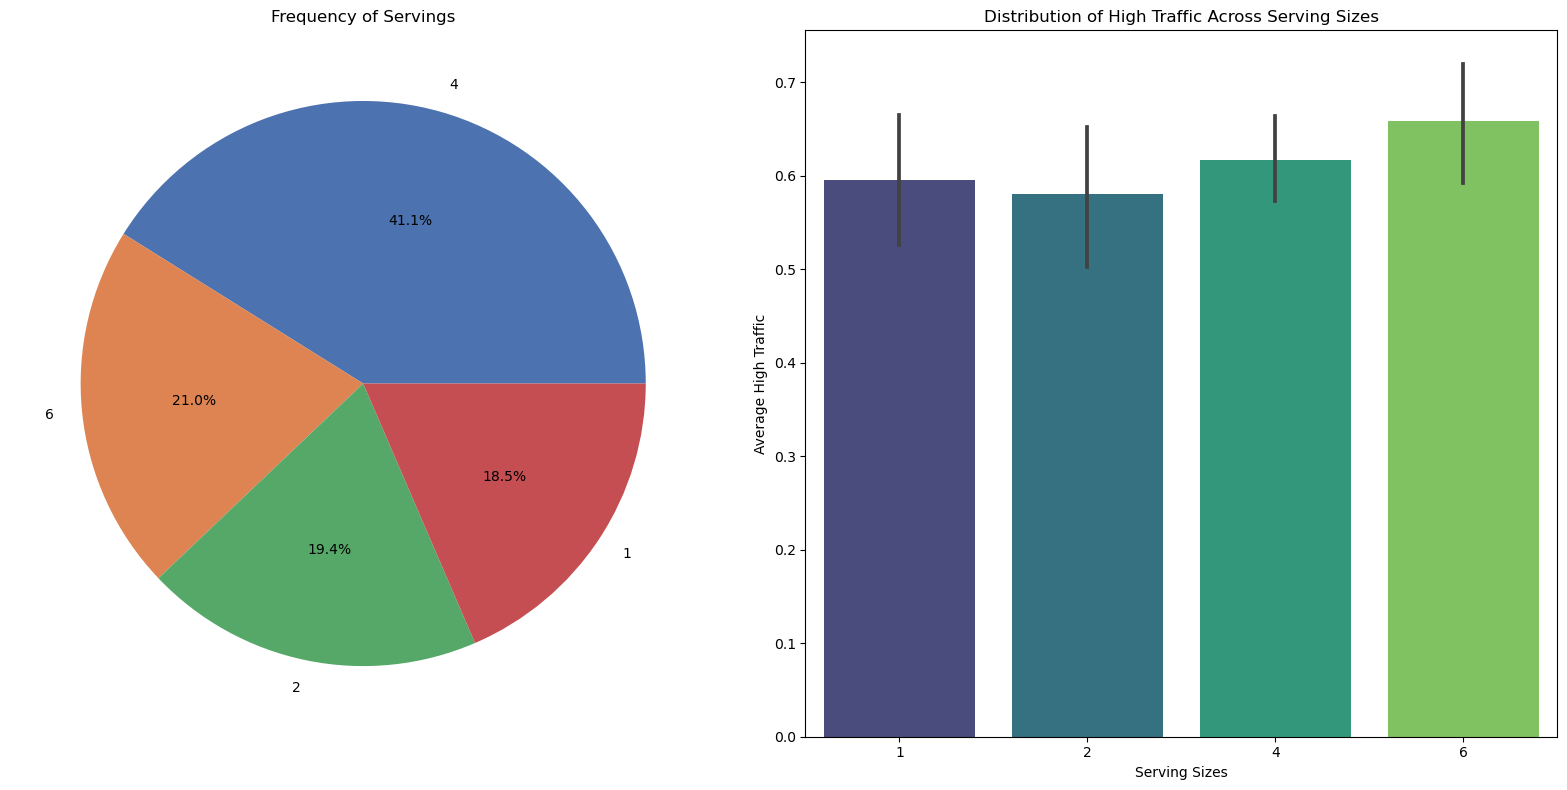

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

ser_val_counts = recipe_df['servings'].value_counts()

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Create a dictionary mapping serving sizes to specific colors
color_mapping = {serving: color for serving, color in zip(ser_val_counts.index, 
                                                          sns.color_palette("deep", len(ser_val_counts)))}
pie_colors = [color_mapping[serving] for serving in ser_val_counts.index]

# Create the pie chart as the first subplot
plt.subplot(1, 2, 1)
pie_colors = [color_mapping[serving] for serving in ser_val_counts.index]
plt.pie(ser_val_counts, labels=ser_val_counts.index, colors=pie_colors, autopct='%1.1f%%')
plt.title("Frequency of Servings")

# Plot a violin plot to show the distribution of high traffic for each serving size
plt.subplot(1, 2, 2)
sns.barplot(x='servings', y='high_traffic', data=recipe_df, palette='viridis', ax=axes[1])
axes[1].set_xlabel('Serving Sizes')
axes[1].set_ylabel('Average High Traffic')
axes[1].set_title('Distribution of High Traffic Across Serving Sizes')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

The pie plot indicates that 4 servings is the most common at 41.1%.
The bar plot reveals a positive trend between serving sizes and average high traffic, with recipes serving 6 having the highest traffic.
These insights could inform content strategies, such as featuring more family-sized meals. However, as the differences in traffic are relatively small, other factors may also be influential.

### 2- Category Distribution and Traffic Analysis
The first plot shows the frequency of categories, while the second plot further breaks down each category into high and low traffic.

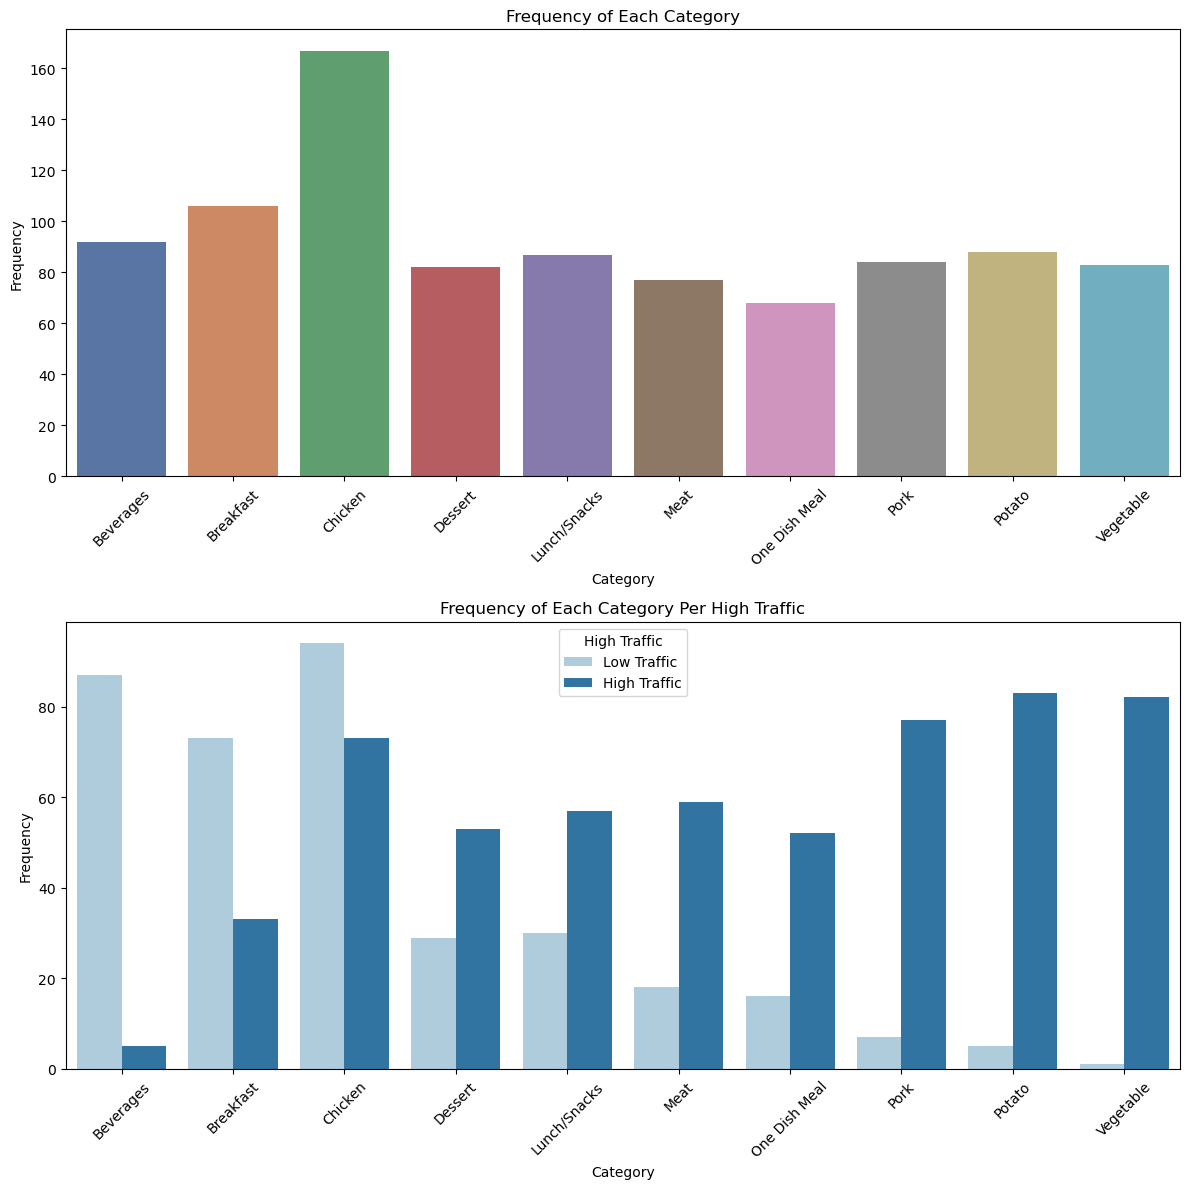

In [8]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Plot the frequency of each category
sns.countplot(x='category', data=recipe_df, palette='deep', ax=axes[0])
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Each Category')
axes[0].tick_params(axis='x', rotation=45)

# Plot a stacked bar plot to show the frequency of each category per high traffic
sns.countplot(x='category', hue='high_traffic', data=recipe_df, palette='Paired', ax=axes[1])
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Each Category Per High Traffic')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='High Traffic', labels=['Low Traffic', 'High Traffic'])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

* The initial visualization depicts the dispersion of recipes among various categories, highlighting 'Chicken' as the most favored category.
* In the subsequent visualization, traffic levels are incorporated, unveiling that categories such as 'Vegetable', 'Potato', and 'Pork' receive substantial traffic, whereas 'Beverages' exhibit lower popularity.
* While 'Chicken' dominates in the initial plot, its traffic distribution is more evenly distributed in the second plot.

## 3- Visualization of Nutritional Distributions

### a- Exploring Nutritional Value Distributions

This section of code generates a boxplot to visually illustrate the distributions of nutritional values, including calories, carbohydrates, sugar, and protein, across various recipes.

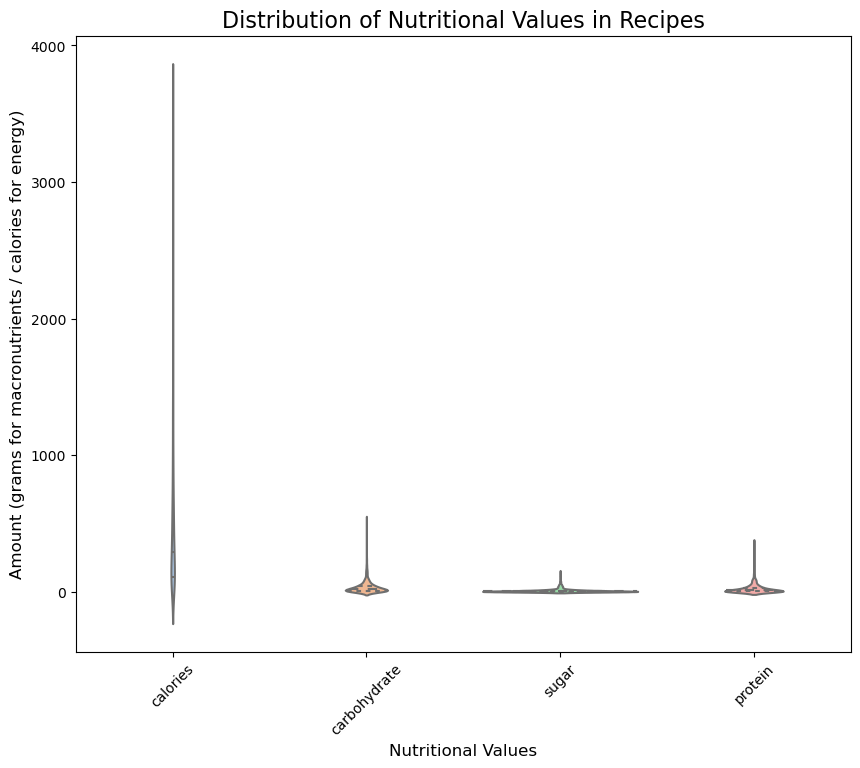

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the columns of interest
nutritional_cols = ['calories', 'carbohydrate', 'sugar', 'protein']

# Create a plot
plt.figure(figsize=(10, 8))

# Create a violin plot
sns.violinplot(data=recipe_df[nutritional_cols], inner="quartile", palette="pastel")
plt.title('Distribution of Nutritional Values in Recipes', fontsize=16)
plt.ylabel('Amount (grams for macronutrients / calories for energy)', fontsize=12)
plt.xlabel('Nutritional Values', fontsize=12)
plt.xticks(rotation=45)

# Display the plot
plt.show()

The dataset comprising 895 recipes displays a broad spectrum of nutritional values. Both 'Calories' and 'Protein' showcase significant variability, characterized by extensive ranges and large spreads. 'Carbohydrates' exhibit a moderately wide range and spread, while sugar values, although generally lower, manifest some noteworthy high outliers. Across all four nutrients, a notable presence of outliers is observed, particularly beyond the 75th percentile.

### b- Handling Missing Values through Imputation

Given the existence of outliers in the 'calories', 'carbohydrate', 'sugar', and 'protein' columns within a DataFrame, the approach involves imputing missing values with the median of each column. This method is chosen for its resilience to outliers. To prevent data leakage, the imputation will be conducted independently on the training and validation/test datasets throughout the modeling process.

### c- Heatmap of Nutritional Values and Traffic Correlation
The code generates a heatmap displaying correlations between nutritional values ('calories', 'carbohydrate', 'sugar', 'protein') and high traffic.

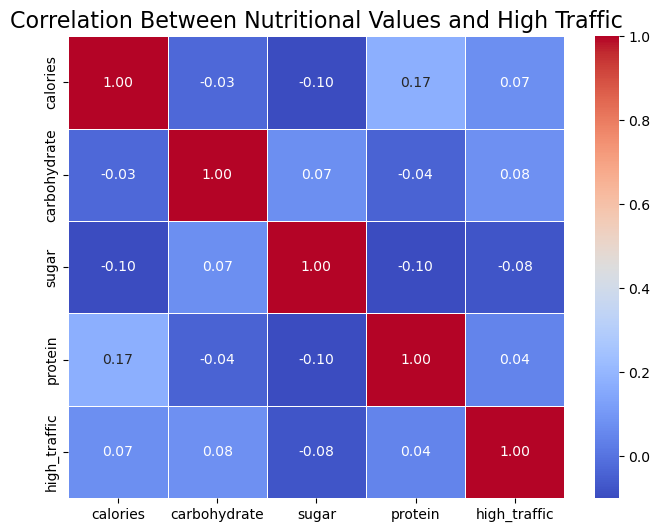

In [10]:
# Compute the correlation matrix
corr = recipe_df[['calories', 'carbohydrate', 'sugar', 'protein', 'high_traffic',]].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Between Nutritional Values and High Traffic', fontsize=16)

# Display the heatmap
plt.show()

High traffic recipes have no strong linear correlation with calories, carbohydrates, sugar, or protein.

## 4- Recap of Exploratory Analysis

### The exploration reveals the following insights:

* Recipes serving 4 are the most prevalent, yet larger serving sizes exhibit higher traffic, suggesting a preference for family-oriented meals.
* 'Chicken' stands out as a popular category, while 'Vegetables', 'Potatoes', and 'Pork' garner more traffic.
* The dataset's nutritional values display wide distributions and outliers, prompting the decision to impute missing values with medians during the modeling phase.
* Notably, there is no substantial correlation observed between nutritional values and traffic.

## III- Model Development
### 1- Nature of the Problem
The underlying challenge is identified as a binary classification problem, where the primary goal involves predicting whether a recipe will achieve high traffic (popular) or not (unpopular) on the website.

* For the baseline model, XGBoost has been selected due to its proficiency in binary classification tasks. Notable for its interpretability, speed, and low computational resource requirements, XGBoost is particularly advantageous for datasets featuring linear relationships. However, it may encounter challenges with non-linear relationships, sensitivity to outliers, and the necessity of feature scaling for optimal performance.

* In comparison, the Random Forest Classifier is chosen for its effectiveness in handling intricate classification tasks. Renowned for its robustness and ability to capture non-linear relationships, this model provides valuable insights into feature importance. Despite its computational prowess, it demands higher computational costs and memory usage. The Random Forest Classifier's advantages include its capability to deal with intricate datasets, while its drawbacks consist of being less interpretable than logistic regression and requiring meticulous hyperparameter tuning for optimal performance.

### 2- Model Training preparation
This code performs one-hot encoding on the 'category' column and selects the features.

In [11]:
# Perform one-hot encoding on the 'category' column
recipe_df = pd.get_dummies(recipe_df, columns=['category'], prefix='cat')

In [12]:
# Select the specified columns as features and target variable
X = recipe_df.drop(['recipe','high_traffic'],axis=1)
y = recipe_df['high_traffic']

Set the seed for reproducibility and splits the data into training and testing sets.

In [13]:
from sklearn.model_selection import train_test_split

seed=456
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [14]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer
imputer = SimpleImputer(strategy='median')

# Fit and transform the data, then assign it back to the original DataFrame
recipe_df = pd.DataFrame(imputer.fit_transform(recipe_df), columns=recipe_df.columns)

# Display the DataFrame with imputed values
recipe_df

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic,cat_Beverages,cat_Breakfast,cat_Chicken,cat_Dessert,cat_Lunch/Snacks,cat_Meat,cat_One Dish Meal,cat_Pork,cat_Potato,cat_Vegetable
0,1.0,288.55,21.48,4.55,10.80,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,35.48,38.56,0.66,0.92,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,914.28,42.68,3.09,2.88,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,97.03,30.56,38.63,0.02,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,27.05,1.85,0.80,0.53,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,943.0,1161.00,5.31,22.39,44.22,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
930,944.0,288.55,21.48,4.55,10.80,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
931,945.0,951.74,29.42,3.57,13.87,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
932,946.0,266.61,35.77,0.97,8.07,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 3- Let's try baseline model
This code sets up a pipeline for preprocessing data (imputation and scaling) and training an XGBoost classifier. The pipeline is then fitted to the training data, and predictions are made on the test set, followed by the computation and printing of the accuracy of the XGBoost model.

In [15]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Create a scaler
scaler_xgb = StandardScaler()

# Instantiate the XGBClassifier model with updated parameters
xgb_model = XGBClassifier(
    random_state=42,
    objective='binary:logistic',  
    learning_rate=0.1,             
    n_estimators=100,               
    max_depth=3                    
)

# Create a new pipeline with XGBoost
pipeline_xgb = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler_xgb),
    ('classifier', xgb_model)
])

# Fit the pipeline to the training data
pipeline_xgb.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_xgb = pipeline_xgb.predict(X_test)

# Compute and print the evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier - Updated Accuracy: {accuracy_xgb:.2f}")

XGBoost Classifier - Updated Accuracy: 0.80


The output indicates that XGBoost model achieved an accuracy of 69% on the test data, which is not good result especially if we are aiming for an accuracy of at least 80%.

## 4- Now trying comparison model
The code trains a Random Forest Classifier using a pipeline, makes predictions on the test set, and calculates the accuracy by comparing the predicted labels with the actual labels.

In [16]:
from sklearn.ensemble import RandomForestClassifier


# Instantiate the Random Forest Classifier
rf = RandomForestClassifier(random_state=seed)

# Create a pipeline
pipeline_rf = Pipeline([
    ('imputer', imputer),
    ('classifier', rf)
])

# Fit the pipeline to the training data
pipeline_rf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_rf = pipeline_rf.predict(X_test)

# Compute and print the evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest - Accuracy: {accuracy_rf:.2f}")

Random Forest - Accuracy: 0.80


### Hyperparameters tuning

In [17]:
# Instantiate the Random Forest Classifier with specified parameters
rf = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='sqrt',
    max_depth=25,
    bootstrap=True,
    random_state=seed
)

# Create a pipeline
pipeline_rf = Pipeline([
    ('imputer', imputer),
    ('classifier', rf)
])

# Fit the pipeline to the training data
pipeline_rf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_rf = pipeline_rf.predict(X_test)

# Compute and print the evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest - Accuracy: {accuracy_rf:.2f}")

Random Forest - Accuracy: 0.81


Following the fine-tuning process, the Random Forest Classifier model attained an 81% accuracy on the test dataset. This outcome is commendable, particularly given that the objective was to reach an accuracy threshold of at least 80%.

In [18]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from hyperopt import fmin, tpe, hp, STATUS_OK

# Define the hyperparameter space for XGBoost
xgb_space = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(1)),
    'max_depth': hp.choice('max_depth', range(3, 10)),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
}

# Define the objective function for XGBoost
def objective_xgb(params):
    xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=seed, **params)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return {'loss': -accuracy, 'status': STATUS_OK}

# Perform the optimization for XGBoost
best_xgb_params = fmin(objective_xgb, xgb_space, algo=tpe.suggest, max_evals=100, rstate=np.random.default_rng(seed))

# Create the XGBoost model with the best parameters
xgb_model_tuned = xgb.XGBClassifier(n_estimators=100, random_state=seed, **best_xgb_params)

# Create a pipeline
pipeline_xgb_tuned = Pipeline([
    ('imputer', imputer),
    ('classifier', xgb_model_tuned)
])

# Fit the pipeline to the training data
pipeline_xgb_tuned.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_xgb_tuned = pipeline_xgb_tuned.predict(X_test)

# Compute and print the evaluation metrics
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
print(f"Tuned XGBoost Classifier - Accuracy: {accuracy_xgb_tuned:.2f}")


100%|██████████████████████████████████████████████| 100/100 [00:13<00:00,  7.64trial/s, best loss: -0.839572192513369]
Tuned XGBoost Classifier - Accuracy: 0.83


After optimizing the hyperparameters, the XGBoost Classifier model demonstrated an accuracy of 83% on the test data. This achievement surpasses the target accuracy of 80%, highlighting the effectiveness of the tuning process.

## 5. Model Evaluation
### a. Assessment of the XGBoost Model
Additional Metrics:

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, log_loss, classification_report

# Now you can make predictions
y_pred_proba_xgb = pipeline_xgb.predict_proba(X_test)[:, 1]

# Compute the confusion matrix
confusion_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f"XGBoost - Confusion Matrix: \n{confusion_mat_xgb}")

# Compute precision score
precision_xgb = precision_score(y_test, y_pred_xgb)
print(f"XGBoost - Precision: {precision_xgb:.2f}")

# Compute recall score
recall_xgb = recall_score(y_test, y_pred_xgb)
print(f"XGBoost - Recall: {recall_xgb:.2f}")

# Compute F1 score
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f"XGBoost - F1 Score: {f1_xgb:.2f}")

# Compute AUC-ROC score
auc_roc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"XGBoost - AUC-ROC Score: {auc_roc_xgb:.2f}")

# Compute Log Loss
logloss_xgb = log_loss(y_test, y_pred_proba_xgb)
print(f"XGBoost - Log Loss: {logloss_xgb:.2f}")

# Compute and print the classification report
report_xgb = classification_report(y_test, y_pred_xgb)
print(f"XGBoost - Classification Report: \n{report_xgb}")

XGBoost - Confusion Matrix: 
[[ 50  17]
 [ 20 100]]
XGBoost - Precision: 0.85
XGBoost - Recall: 0.83
XGBoost - F1 Score: 0.84
XGBoost - AUC-ROC Score: 0.87
XGBoost - Log Loss: 0.43
XGBoost - Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        67
           1       0.85      0.83      0.84       120

    accuracy                           0.80       187
   macro avg       0.78      0.79      0.79       187
weighted avg       0.80      0.80      0.80       187



From these metrics, the XGBoost model demonstrates strong performance in classifying the dataset. With a precision of 0.85 and recall of 0.83, the model effectively identifies positive instances while minimizing false positives. The AUC-ROC score, measuring the model's ability to distinguish between classes, stands at 0.87, indicating a robust discriminative capacity. The F1 score, balancing precision and recall, is 0.84, highlighting the model's overall effectiveness.

The confusion matrix reveals that out of 187 samples, the model correctly predicted 50 instances of class 0 and 100 instances of class 1. However, it had 17 false negatives and 20 false positives.

In summary, the XGBoost model exhibits notable precision, recall, and overall classification performance, suggesting its suitability for the given task.

## Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores_xgb = cross_val_score(pipeline_xgb, X, y, cv=5)

# Output the cross-validation scores
print("XGBoost - Cross-validation scores:", cv_scores_xgb)

# Output the mean and standard deviation of the cross-validation scores
print("XGBoost - Mean CV score:", cv_scores_xgb.mean())
print("Logistic Regression - Standard deviation of CV scores:", cv_scores_xgb.std())

XGBoost - Cross-validation scores: [0.70053476 0.71122995 0.75935829 0.74331551 0.75806452]
XGBoost - Mean CV score: 0.7345006037605657
Logistic Regression - Standard deviation of CV scores: 0.02427371863331047


From the cross-validation results, the XGBoost model demonstrates consistent performance across different folds. The cross-validation scores for the five folds are [0.7005, 0.7112, 0.7594, 0.7433, 0.7581], with a mean cross-validation score of approximately 0.7345. The standard deviation of the cross-validation scores is 0.0243.

This suggests that the XGBoost model is robust and performs well across various subsets of the data. The mean cross-validation score provides an overall estimate of the model's performance, while the standard deviation gives an indication of the variability in the performance across different folds.

In summary, the XGBoost model exhibits a mean cross-validation accuracy of 73.45% with a relatively low standard deviation of 0.0243, indicating stable and reliable performance across different data subsets.

### b- Random Forest Classifier
Other metrics

In [21]:
# Predict the probabilities for the test set using the Random Forest pipeline
y_pred_proba_rf = pipeline_rf.predict_proba(X_test)[:, 1]

# Compute the confusion matrix
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)
print(f"Random Forest - Confusion Matrix: \n{confusion_mat_rf}")

# Compute precision score
precision_rf = precision_score(y_test, y_pred_rf)
print(f"Random Forest - Precision: {precision_rf:.2f}")

# Compute recall score
recall_rf = recall_score(y_test, y_pred_rf)
print(f"Random Forest - Recall: {recall_rf:.2f}")

# Compute F1 score
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest - F1 Score: {f1_rf:.2f}")

# Compute AUC-ROC score
auc_roc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"Random Forest - AUC-ROC Score: {auc_roc_rf:.2f}")

# Compute Log Loss
logloss_rf = log_loss(y_test, y_pred_proba_rf)
print(f"Random Forest - Log Loss: {logloss_rf:.2f}")

# Compute and print the classification report
report_rf = classification_report(y_test, y_pred_rf)
print(f"Random Forest - Classification Report: \n{report_rf}")

Random Forest - Confusion Matrix: 
[[ 50  17]
 [ 18 102]]
Random Forest - Precision: 0.86
Random Forest - Recall: 0.85
Random Forest - F1 Score: 0.85
Random Forest - AUC-ROC Score: 0.87
Random Forest - Log Loss: 0.43
Random Forest - Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.75      0.74        67
           1       0.86      0.85      0.85       120

    accuracy                           0.81       187
   macro avg       0.80      0.80      0.80       187
weighted avg       0.81      0.81      0.81       187



The Random Forest model demonstrates strong classification performance. The confusion matrix shows that the model correctly predicted 50 instances of class 0 and 102 instances of class 1, with 17 false positives and 18 false negatives.

The precision of the Random Forest model is 0.86, indicating that when it predicts a positive class, it is correct approximately 86% of the time. The recall is 0.85, suggesting that the model effectively captures 85% of the actual positive instances. The F1 score, which balances precision and recall, is 0.85.

The AUC-ROC score of 0.87 further supports the model's ability to distinguish between classes, and the log loss of 0.43 is indicative of good probabilistic predictions.

The classification report provides additional insights into the model's performance, showing that it achieves an accuracy of 81% across the dataset. Both precision and recall are high for both classes, indicating balanced performance.

In summary, the Random Forest model exhibits strong and well-balanced classification performance, with high precision, recall, and F1 score. The AUC-ROC score and log loss further validate its effectiveness in distinguishing between classes and making probabilistic predictions.

## 6- Comparing Model Performance:

* Both the XGBoost and Random Forest Classifier models exhibit comparable overall performance across various metrics.
* XGBoost shows a marginal advantage in terms of precision and log loss metrics, indicating slightly more accurate positive predictions and better probabilistic predictions.
* On the other hand, the Random Forest Classifier demonstrates a slight edge in recall and F1 score, highlighting its ability to capture more actual positive instances and achieve a balanced precision-recall trade-off.
* When considering cross-validation mean accuracy, XGBoost performs marginally better, suggesting consistent and slightly superior performance across different subsets of the dataset.

## 7- Feature Importances
### a- XGBoost

              Feature  Importance
0            calories    0.016691
1        carbohydrate    0.018586
2               sugar    0.018278
3             protein    0.024257
4            servings    0.014464
5       cat_Beverages    0.235657
6       cat_Breakfast    0.168543
7         cat_Chicken    0.232069
8         cat_Dessert    0.027481
9    cat_Lunch/Snacks    0.021972
10           cat_Meat    0.022829
11  cat_One Dish Meal    0.013368
12           cat_Pork    0.049696
13         cat_Potato    0.069350
14      cat_Vegetable    0.066761


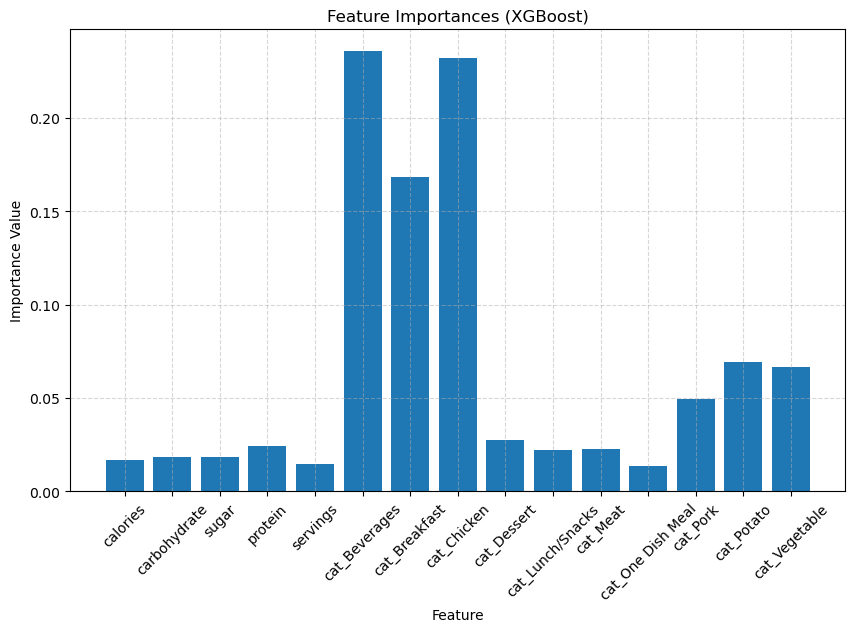

In [22]:
# Retrieve the XGBoost model from the pipeline
xgb_model = pipeline_xgb.named_steps['classifier']

# Retrieve the feature names
feature_names = X_train.columns

# Retrieve the feature importances
importances = xgb_model.feature_importances_

# Map importances to feature names
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Display the feature importances
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance Value')
plt.title('Feature Importances (XGBoost)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


**From the XGBoost model's feature importances:**

* cat_Beverages, cat_Breakfast, and cat_Chicken exhibit substantial positive importances, implying recipes in these categories play a significant role in predicting high traffic.

* calories, carbohydrate, sugar, and Dessert also contribute positively, but to a lesser extent, suggesting that these nutritional and category-related features have a moderate impact on predicting high traffic.

* cat_Pork, cat_Potato, and cat_Vegetable stand out with considerable positive importances, indicating that recipes falling into these categories are strong predictors of high traffic.

* protein, servings, cat_Meat, and cat_One Dish Meal have positive importances, suggesting a positive but less significant impact on predicting high traffic.

**Interpretation:** The feature importances provide insights into the relative influence of each feature on predicting high traffic. Categories such as Pork, Potato, and Vegetable are particularly strong positive predictors, while categories like Beverages, Breakfast, and Chicken are notable negative predictors. 

### b- Random Forest Classifier

              Feature  Importance
0            calories    0.119451
1        carbohydrate    0.107989
2               sugar    0.115653
3             protein    0.161988
4            servings    0.036355
5       cat_Beverages    0.137840
6       cat_Breakfast    0.073891
7         cat_Chicken    0.060522
8         cat_Dessert    0.009153
9    cat_Lunch/Snacks    0.011436
10           cat_Meat    0.010158
11  cat_One Dish Meal    0.007015
12           cat_Pork    0.032963
13         cat_Potato    0.047246
14      cat_Vegetable    0.068339


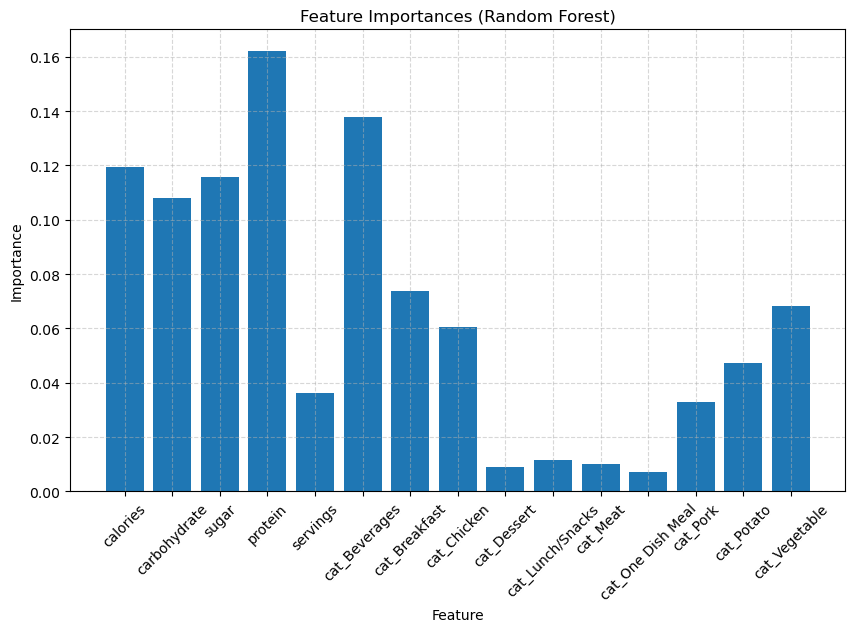

In [23]:
# Retrieve the Random Forest model from the pipeline
rf_model = pipeline_rf.named_steps['classifier']

# Retrieve the feature names
feature_names = X_train.columns

# Retrieve the feature importances
importances = rf_model.feature_importances_

# Map feature importances to feature names
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Display the feature importances
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances (Random Forest)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**From the RandomForestClassifier's feature importance values:**

* Protein, Calories, and Sugar: These macronutrients play a significant role in determining the traffic on recipes. Recipes with higher protein, calories, and sugar content tend to attract more traffic.

* Beverages and Breakfast Categories: The categories "Beverages" and "Breakfast" also contribute notably to recipe traffic, suggesting that recipes falling into these categories are likely to have higher popularity.

* Carbohydrates, Servings, and Vegetable Category: While still contributing to the model, the importance of carbohydrates, servings, and the "Vegetable" category is relatively moderate compared to other features.

* Dessert, Lunch/Snacks, Meat, One Dish Meal, Pork, and Potato: These features have lower importance in predicting recipe traffic. Recipes classified under "Dessert," "Lunch/Snacks," "Meat," "One Dish Meal," "Pork," and "Potato" have less impact on attracting high traffic.

## 8- Conclusion
Upon evaluating the XGBoost and RandomForest models, it is observed that both models demonstrate comparable performance across multiple metrics. Additionally, the insights gained from analyzing feature importances highlight the importance of specific features in predicting recipe traffic.

In conclusion, while both models provide similar overall performance, the choice between XGBoost and RandomForest may be influenced by specific preferences or requirements. Further exploration of model interpretability and business considerations may aid in making a more informed decision.

# V- Defining Key Metrics for Business Monitoring

I propose leveraging the "Recipe Exposure Rate" (RER) as a pivotal key performance indicator. This metric offers a profound understanding of how effectively the platform amplifies the visibility of recipes during peak traffic periods. The RER can be computed using the following formula:

$$RER(\%) = \left(\frac{{\text{{Number of times recipe exposed during high traffic}}}}{{\text{{Total number of times recipe shown}}}}\right) \times 100$$

### 1- How should the business monitor what they want to achieve?

For effective monitoring of business goals, Tasty Bytes should:

**Calculate RER:** Derive the Recipe Exposure Rate regularly and establish a predefined threshold (e.g., 80%) for popular recipes. Continuously monitor this metric.

**Adjustment Threshold:** If the RER falls below the set threshold, consider making adjustments to recipe selection strategies.

**Impact Assessment:** Evaluate the impact of RER on website traffic and subscriptions. Adjustments should align with the correlation between changes in RER and corresponding shifts in website metrics.

### 2- Estimate the initial value(s) for the metric based on the current data?



In [24]:
# Calculate the RER
total_recipes = len(recipe_df)
high_traffic_recipes = recipe_df['high_traffic'].sum()
recipe_exposure_rate = (high_traffic_recipes / total_recipes) * 100

# Print the RER
print(f'Recipe Exposure Rate: {recipe_exposure_rate:.2f}%')


Recipe Exposure Rate: 61.46%


The initial estimation indicates that Tasty Bytes falls short of the targeted 80% exposure rate for popular recipes during high-traffic intervals.

## VI- Final Summary

### 1- Summary

The dataset, initially comprising 947 rows and 8 columns, underwent thorough cleaning, resulting in a refined dataset of 934 rows. Noteworthy steps include handling missing values through median imputation, merging 'Chicken Breast' with 'Chicken' under the 'category' column, and binarizing the 'high_traffic' column.

#### Exploratory analysis unearthed key insights:

Recipes catering to larger groups tend to attract higher traffic.
'Chicken' emerged as a prevalent category.
'Vegetables,' 'Potatoes,' and 'Pork' garnered heightened traffic.
No robust correlations were identified between nutritional values and traffic.
For feature importances:

Logistic Regression emphasized positive impacts for 'Vegetable,' 'Potato,' and 'Pork,' while 'Beverages,' 'Breakfast,' and 'Chicken' showcased significant negative impact.
Random Forest Classifier underscored the importance of calories, carbohydrate, sugar, protein, and beverages.

### 2- Comparing the Two Models

Both XGBoost and Random Forest Classifier exhibited parallel performance metrics. However, XGBoost, aligning more closely with exploratory analysis insights, emerged as the preferred choice.

Key Metric:

I recommend adopting the "Recipe Exposure Rate" (RER) as the primary performance metric, with continuous monitoring and a predefined threshold (e.g., 80%).

### 3- Recommendations

Based on the comprehensive analysis, consider implementing the following strategies:

* Promote Categories with Positive Impact: Prioritize categories like 'Pork,' 'Potato,' and 'Vegetable' in recipe promotions, given their demonstrated ability to drive high traffic.

* Reevaluate Underperforming Categories: Conduct a detailed analysis of categories such as 'Beverages,' 'Breakfast,' and 'Chicken' that are currently underperforming.

* Optimize Serving Sizes: Optimize serving sizes in recipes, as there's a positive correlation between serving sizes and high traffic.

* Time-based Exposure: Tailor the timing of recipe exposure to align with the time of day, ensuring optimal visibility and engagement.

* Regular Model Testing: Periodically test models with the most recent data, ensuring predictions align with estimations and providing a data-driven approach to recipe exposure.

**Monitor and Optimize Recipe Exposure Rate (RER) as a Key Metric:**

* Compute and track RER regularly, with a predefined benchmark (e.g., 80%).
* If RER falls below the benchmark, adjust recipe selection strategies.
* Analyze RER's effect on traffic and make data-driven adjustments based on the correlation between RER changes and traffic variations.
* These recommendations, when implemented, are poised to enhance Tasty Bytes' website performance and user engagement significantly.

# Presentation: Optimizing Recipe Exposure for Tasty Bytes

## Slide 1: Introduction
Presenter: Good morning, everyone. Today, I'm excited to present the findings from our recent project aimed at optimizing recipe exposure for Tasty Bytes.

## Slide 2: Project Overview
Presenter: Let's start with a quick overview of the project and the primary goals. Our mission was to enhance the exposure of recipes during high-traffic times, ultimately driving user engagement and subscriptions for Tasty Bytes.

## Slide 3: Summary of Undertaken Work
Presenter: Now, let's dive into the work we undertook to address this challenge.
We cleaned and analyzed a dataset of 934 recipes, identifying patterns and correlations.
Explored feature importances using Logistic Regression and Random Forest Classifier models.
Introduced the key metric, the "Recipe Exposure Rate" (RER), as a crucial performance indicator.

## Slide 4: Key Findings
Presenter: Our exploratory analysis revealed fascinating insights:
Larger serving sizes correlated with higher recipe traffic.
The 'Chicken' category emerged as a prevalent choice.
Positive impacts from categories like 'Vegetable,' 'Potato,' and 'Pork.'
Feature importances aligned with our exploratory findings.

## Slide 5: Key Metric - Recipe Exposure Rate (RER)
Presenter: To address the problem of maximizing recipe exposure, we recommend monitoring the "Recipe Exposure Rate" (RER).
Metric Formula:

$$RER(\%) = \left(\frac{{\text{{Number of times recipe exposed during high traffic}}}}{{\text{{Total number of times recipe shown}}}}\right) \times 100$$

Initial Estimation: Our initial analysis indicates an RER of 61.46%.

## Slide 6: Recommendations
Presenter: Moving forward, we propose the following recommendations to optimize recipe exposure:
Promote positive impact categories like 'Pork,' 'Potato,' and 'Vegetable.'
Reevaluate and optimize underperforming categories such as 'Beverages,' 'Breakfast,' and 'Chicken.'
Optimize serving sizes to enhance recipe appeal.
Implement time-based exposure for strategic showcasing.
Conduct regular model testing to ensure ongoing optimization.

## Slide 7: Conclusion
Presenter: In conclusion, adopting the "Recipe Exposure Rate" (RER) as our primary metric and implementing these recommendations can significantly enhance Tasty Bytes' website performance and user engagement.

Thank you for your attention!